# Week 10_Lecture 1 and 2- Data Analysis

## Download SUSY Dataset
The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).


### Download
In a terminal, download the data directly from the source and then decompress it. For example:

The information about the dataset can be found at the UCI Machine Learning Repository. We'll start with the SUSY Dataset.

Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [ ]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  78.4M      0 --:--:--  0:00:11 --:--:-- 56.4M


In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 21 16:52 sample_data/
-rw-r--r-- 1 root root 2.3G Oct 22 18:04 SUSY.csv


In [ ]:
!wc -l SUSY.csv

5000000 SUSY.csv


In [ ]:
!head -500000 SUSY.csv > SUSY-small.csv

In [ ]:
!wc -l SUSY-small.csv

500000 SUSY-small.csv


In [ ]:
filename="SUSY-small.csv"
!head -5 "SUSY-small.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [ ]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi",
          "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2",
          "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))
FeatureNames

['M_TR_2',
 'M_Delta_R',
 'MT2',
 'M_R',
 'MET_rel',
 'axial_MET',
 'cos_theta_r1',
 'S_R',
 'R',
 'dPhi_r_b']

Now we can read the data into a pandas dataframe:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename="SUSY-small.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

In [ ]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0.0,0.719035,1.091879,0.291540,1.205962,-1.599117,-1.139445,0.424546,1.154849,0.637185,-0.091178,1.972156,0.697028,0.313636,0.988602,1.981573,0.744828,1.095080,0.006546
499996,1.0,0.910016,-0.364544,-0.777120,0.543648,-0.910632,-1.723707,2.864673,1.458272,2.176558,-0.590911,0.673695,1.662140,2.189362,1.195041,0.910815,1.181893,1.252362,0.826035
499997,1.0,0.842954,0.332476,-1.048564,1.347989,0.320496,-0.666358,0.450433,-0.411872,0.293407,0.630491,0.859920,0.403371,0.416258,0.591989,0.372003,0.716788,0.366991,0.265798
499998,0.0,1.370760,-1.162912,0.893499,2.118091,1.248496,-0.887211,0.164659,0.316840,0.215165,0.280418,3.087083,0.526929,0.151467,0.308067,3.098183,0.233042,0.876216,0.000593


Separate signal and background into different DataFrame for easy reference:

In [ ]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

In [ ]:
print(df_sig.shape)
print(df_bkg.shape)

(229245, 19)
(270755, 19)


l_1_pT


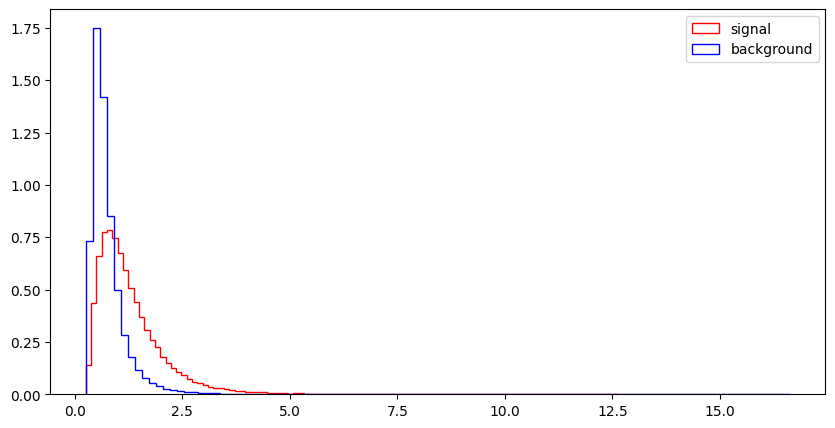

l_1_eta


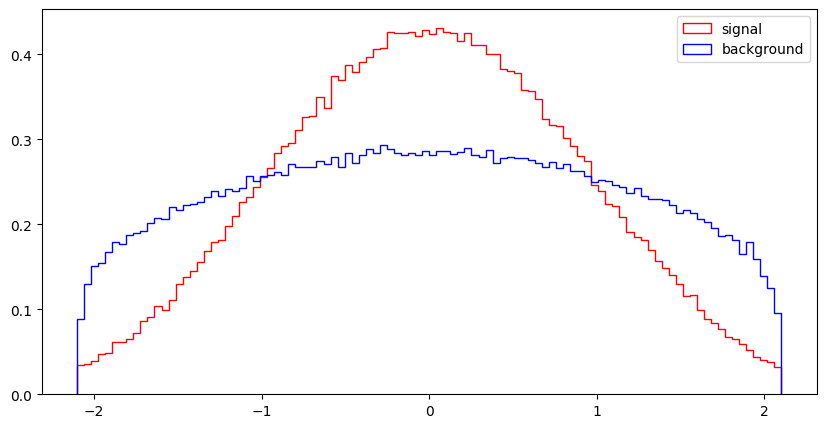

l_1_phi


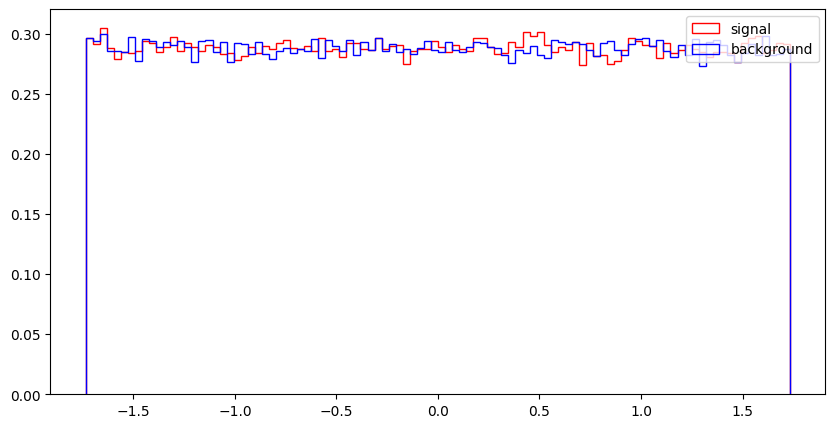

l_2_pT


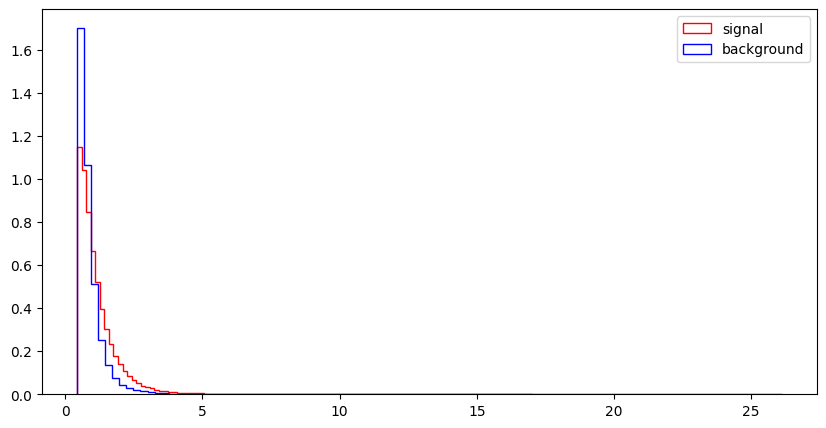

l_2_eta


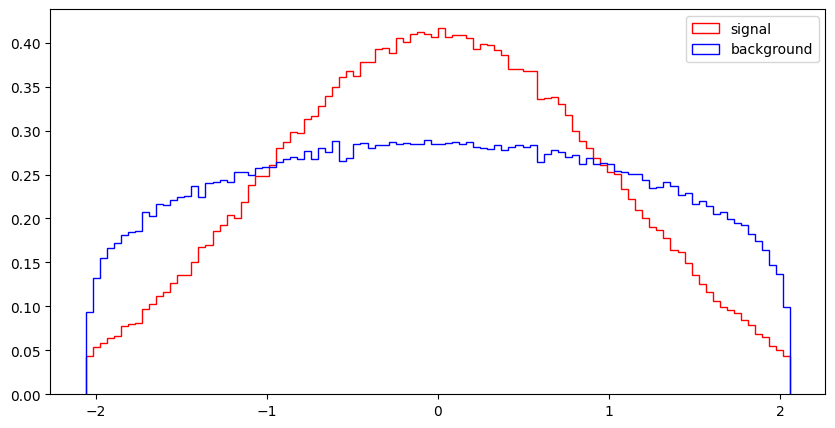

l_2_phi


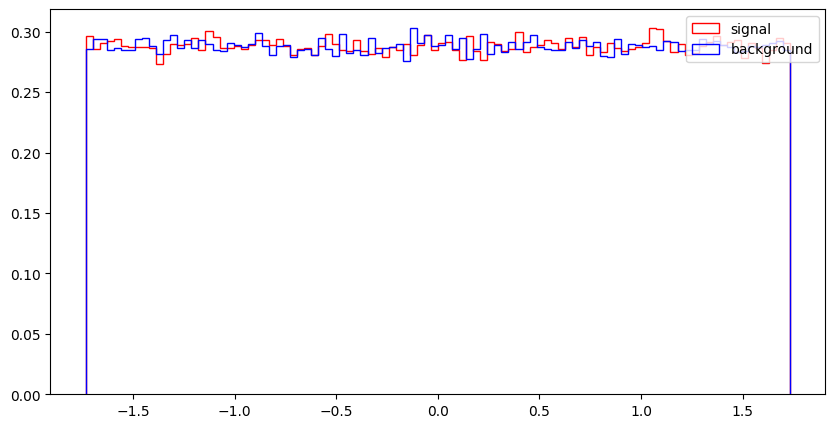

MET


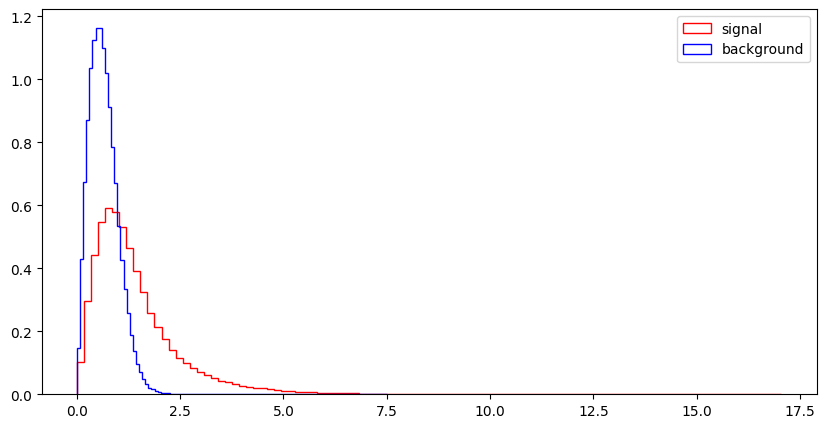

MET_phi


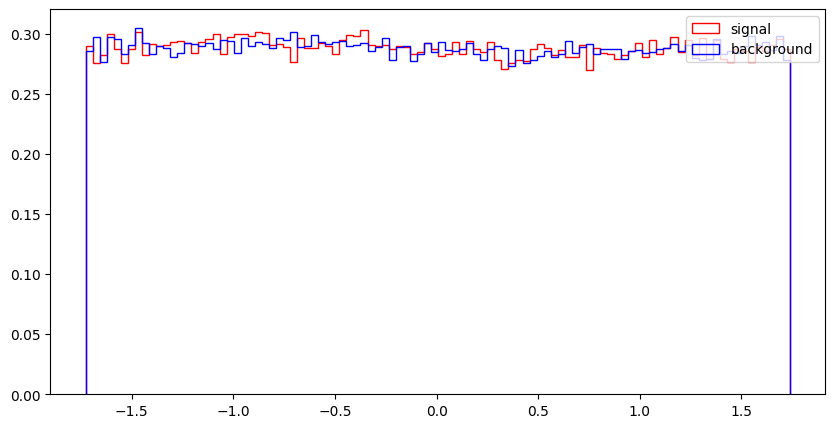

MET_rel


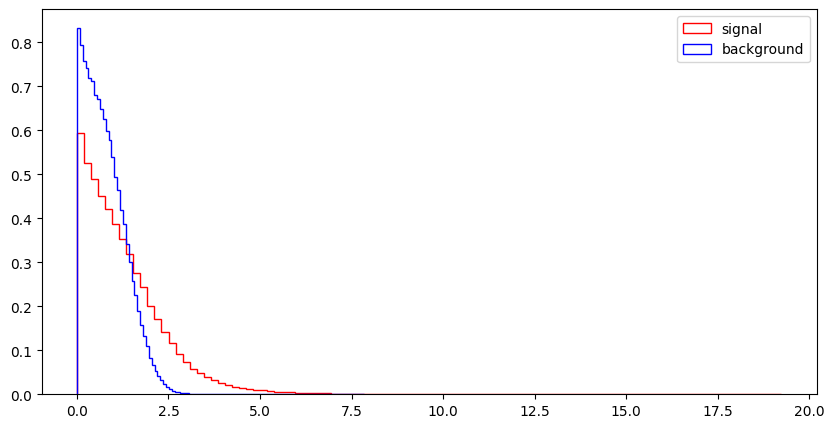

axial_MET


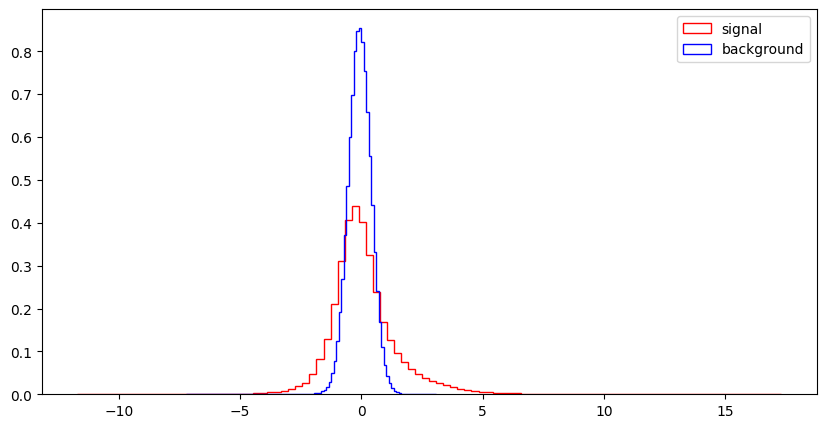

M_R


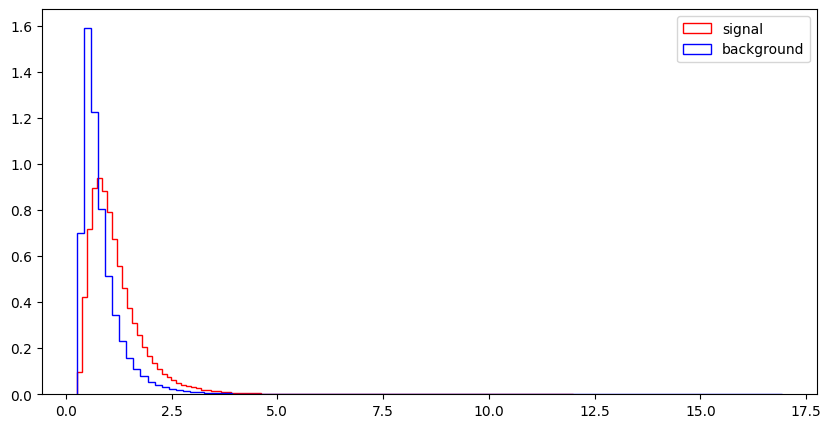

M_TR_2


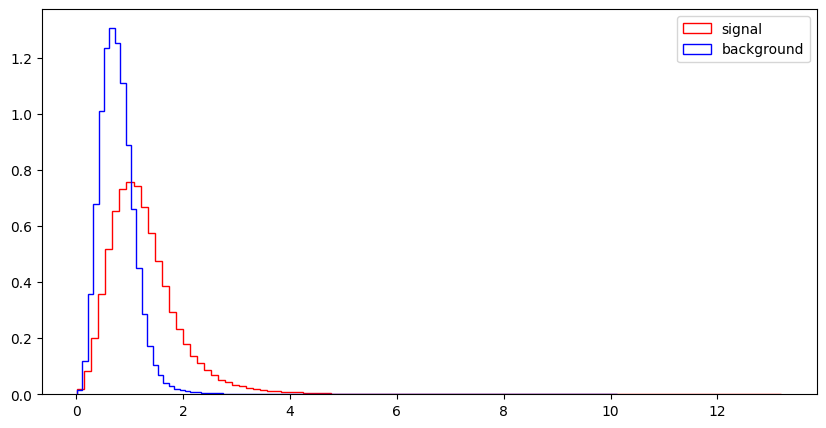

R


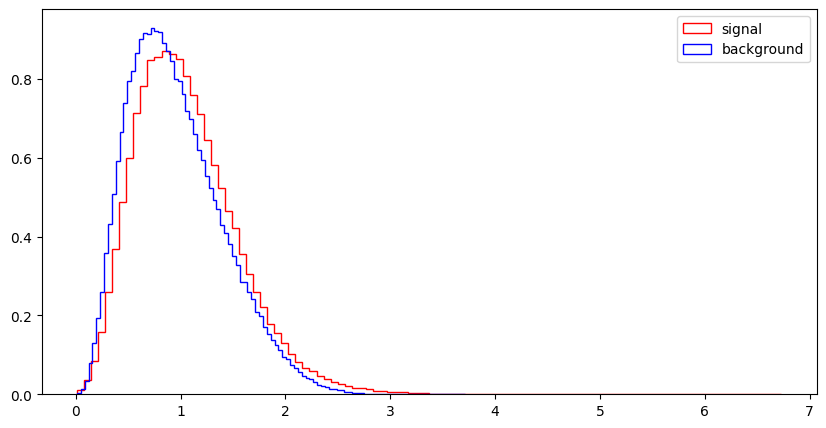

MT2


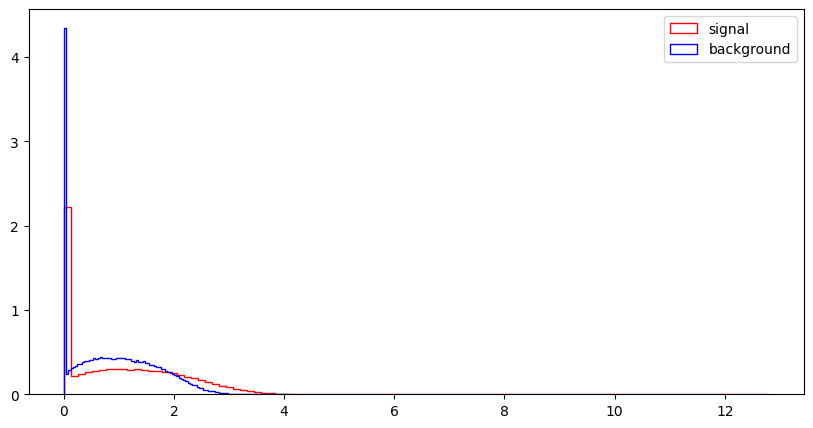

S_R


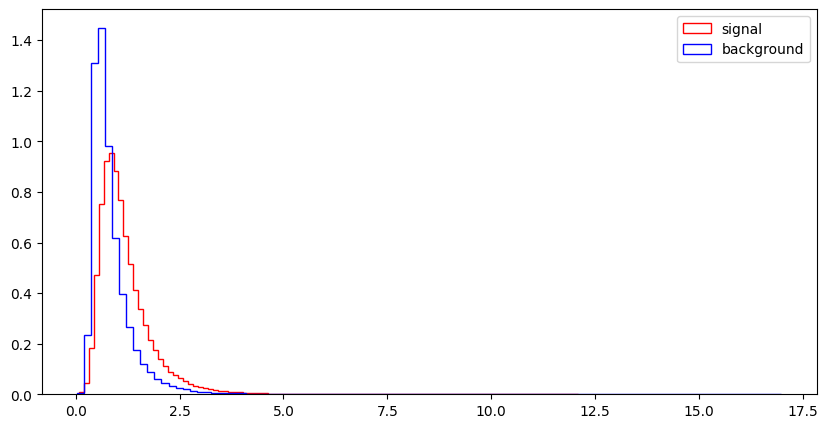

M_Delta_R


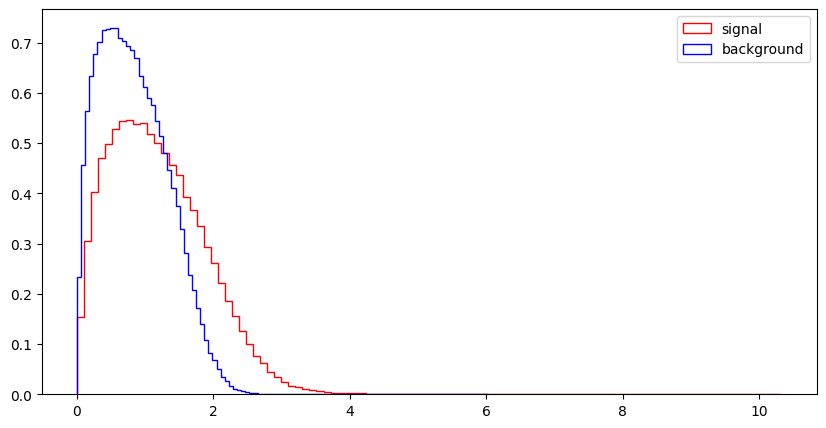

dPhi_r_b


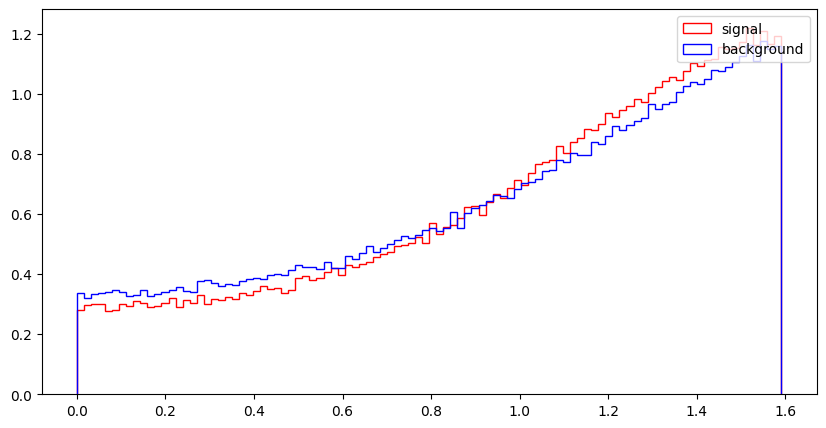

cos_theta_r1


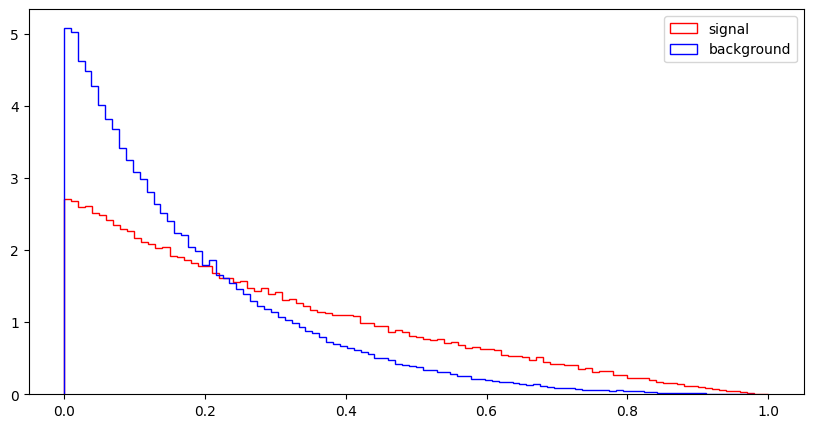

In [ ]:
for var in VarNames[1:]:
   print(var)
   plt.figure(figsize=(10,5))
   plt.hist(np.array(df_sig[var]),bins=100,histtype="step",color="red",label="signal",density=1,stacked=True)
   plt.hist(np.array(df_bkg[var]),bins=100,histtype="step",color="blue",label="background",density=1,stacked=True)
   plt.legend(loc="upper right")
   plt.show()

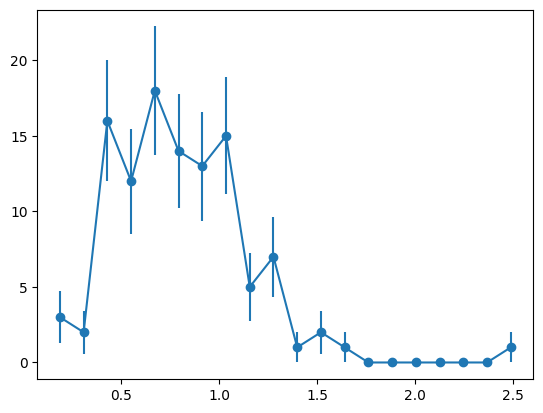

In [ ]:
import math
n_bkg_expected=100
n_sig_expected=10

#mix signal and backgroud events:
data=df_sig[:n_sig_expected]["M_TR_2"].tolist()+df_bkg[:n_bkg_expected]["M_TR_2"].tolist()

c, bin_edges=np.histogram(data,bins=20)

error=np.sqrt(c)

bin_width=bin_edges[1]-bin_edges[0]
bin_centers=0.5*(bin_edges[1:]+bin_edges[:-1])

plt.errorbar(bin_centers,c,yerr=error, marker="o")
plt.show()

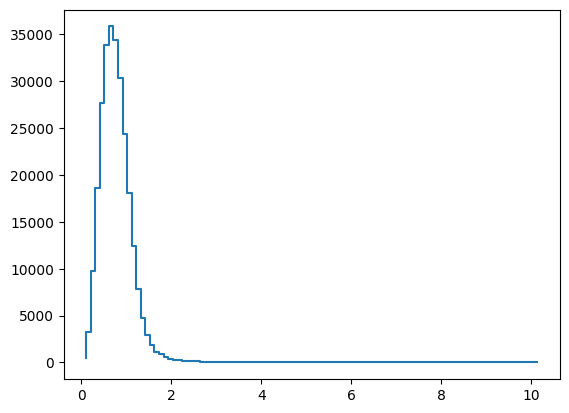

In [ ]:
# background Histogram
c_bkg_sim, sim_bin =np.histogram(df_bkg["M_TR_2"],bins=100)
plt.step(sim_bin[1:],c_bkg_sim)

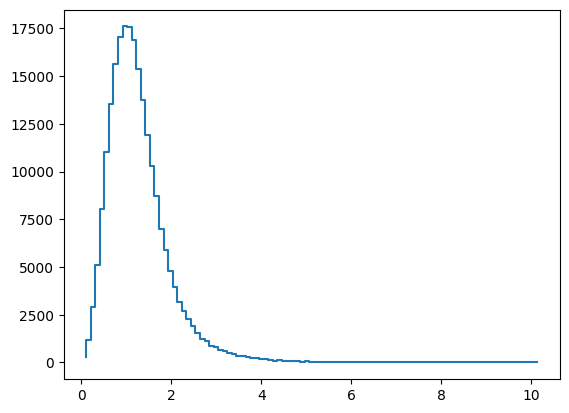

In [ ]:
# Signal Histogram
c_sig_sim, sim_bin = np.histogram(df_sig["M_TR_2"],bins=sim_bin)
plt.step(sim_bin[1:],c_sig_sim)

Bin size: 0.10117358507588506
Integral: 270755
N Bkg Expected: 100
Nornalized Integral: 100.0000000000001


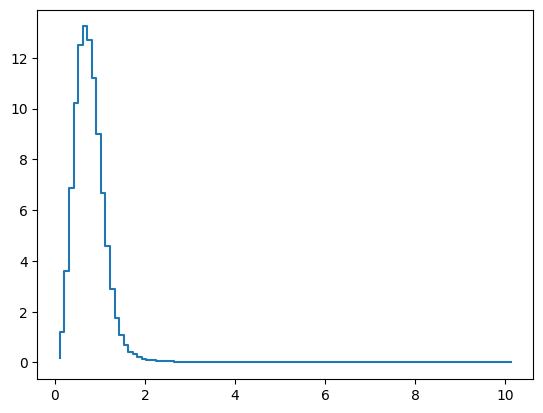

In [ ]:
# Compute the bin size:
bin_size_sim=sim_bin[1]-sim_bin[0]
print("Bin size:", bin_size_sim)

# Compute the integral:
integral=sum(c_bkg_sim)
print("Integral:", integral)
print("N Bkg Expected:", n_bkg_expected)

#Divide the counts by integral and multiply by expected number:
c_bkg_sim_normalized=(n_bkg_expected/ integral)*c_bkg_sim
plt.step(sim_bin[1:],c_bkg_sim_normalized)
print("Nornalized Integral:", sum(c_bkg_sim_normalized))

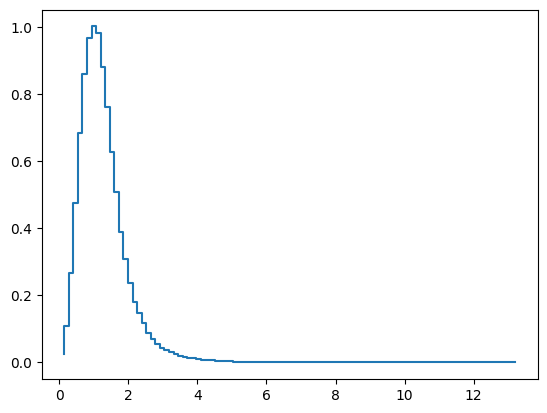

In [ ]:
c_sig_sim,sim_bin=np.histogram(df_sig["M_TR_2"],bins=100)
integral=sum(c_sig_sim)
c_sig_sim_normalized=(n_sig_expected/ integral)*c_sig_sim
plt.step(sim_bin[1:],c_sig_sim_normalized)

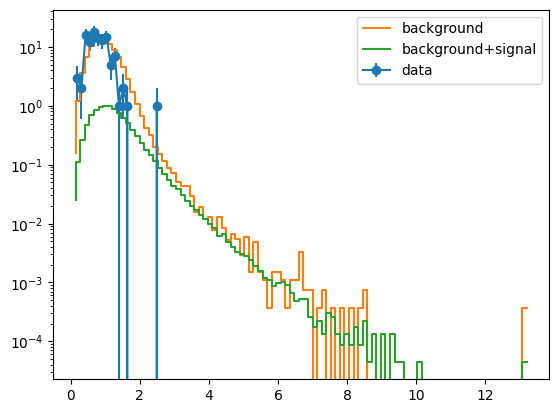

In [ ]:
plt.errorbar(bin_centers,c,yerr=error, marker="o",label="data")
plt.yscale("log")
plt.step(sim_bin[1:],c_bkg_sim_normalized,label="background")
plt.step(sim_bin[1:],c_sig_sim_normalized,label="background+signal")
plt.legend()
plt.show()

## Calculate TPR / FPR

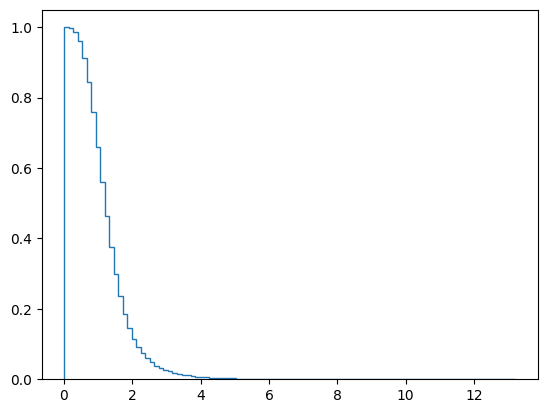

In [ ]:

TPR, bins_sig,_=plt.hist(df_sig["M_TR_2"],bins=100,histtype="step",cumulative=-1,density=True)














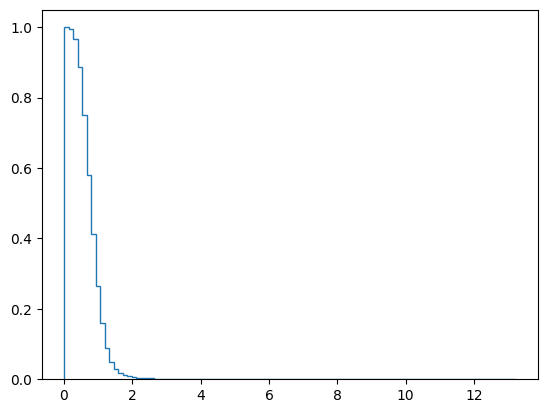

In [ ]:
FPR,bins_sig,_=plt.hist(df_bkg["M_TR_2"],bins=bins_sig,histtype="step",cumulative=-1,density=True)



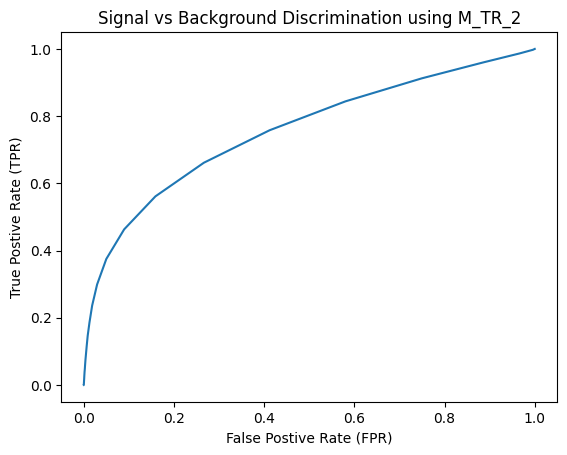

In [ ]:
plt.plot(FPR,TPR)
plt.xlabel("False Postive Rate (FPR)")
plt.ylabel("True Postive Rate (TPR)")
plt.title("Signal vs Background Discrimination using M_TR_2")
plt.show()







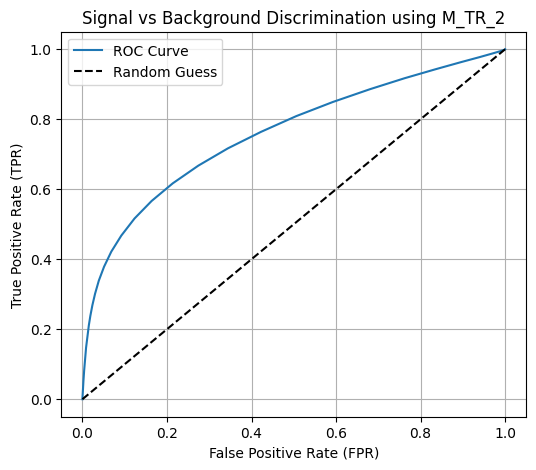

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Extract M_TR_2 values
sig_values = df_sig["M_TR_2"].values
bkg_values = df_bkg["M_TR_2"].values

# Define thresholds covering the range
thresholds = np.linspace(0, max(df["M_TR_2"]), 200)
TPR = []
FPR = []
for t in thresholds:
    # Count signal and background passing M_TR_2 > t
    sig_pass = np.sum(sig_values > t)
    bkg_pass = np.sum(bkg_values > t)

    # Normalize by total counts
    TPR.append(sig_pass / len(sig_values))
    FPR.append(bkg_pass / len(bkg_values))

TPR = np.array(TPR)
FPR = np.array(FPR)
# --- Plot ROC curve ---
plt.figure(figsize=(6,5))
plt.plot(FPR, TPR, label="ROC Curve")
plt.plot([0,1], [0,1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Signal vs Background Discrimination using M_TR_2")
plt.legend()
plt.grid(True)
plt.show()

## Compute Significance

Now that we now the FPR and TPR, we can compute the statistical significance of a counting experiment after selection above a threshold of our feature.

Assume 4 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.







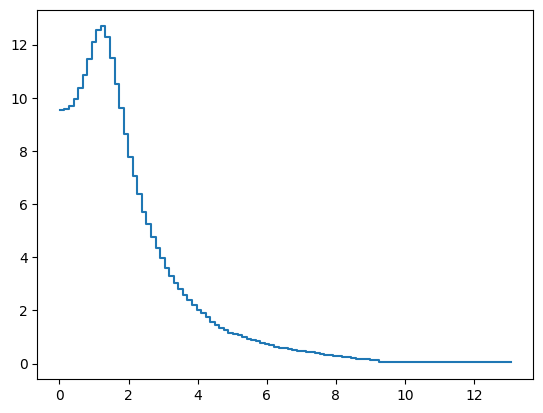

In [ ]:
n_bkg_expected=10000
n_sig_expected=1000
n_sig_expected_prime=n_sig_expected*TPR
n_bkg_expected_prime=n_bkg_expected*FPR

sig= n_sig_expected_prime/np.sqrt(n_sig_expected_prime+n_bkg_expected_prime)
plt.step(bins_sig[:-1],sig)

#mix signal and backgroud events:

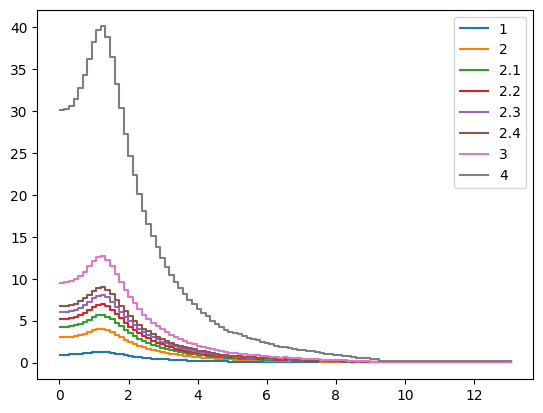

{'1': (np.int64(10),
  np.float64(3.7493947523392004),
  np.float64(4.989067486112752),
  np.float64(1.2683632796320354),
  np.float64(1.3321864132769405)),
 '2': (np.int64(10),
  np.float64(37.493947523392),
  np.float64(49.89067486112753),
  np.float64(4.010916864158284),
  np.float64(1.3321864132769405)),
 '2.1': (np.int64(10),
  np.float64(74.987895046784),
  np.float64(99.78134972225506),
  np.float64(5.672293026843611),
  np.float64(1.3321864132769405)),
 '2.2': (np.int64(10),
  np.float64(112.481842570176),
  np.float64(149.67202458338258),
  np.float64(6.947111793656985),
  np.float64(1.3321864132769405)),
 '2.3': (np.int64(10),
  np.float64(149.975790093568),
  np.float64(199.56269944451012),
  np.float64(8.021833728316569),
  np.float64(1.3321864132769405)),
 '2.4': (np.int64(10),
  np.float64(187.46973761696),
  np.float64(249.45337430563762),
  np.float64(8.968682760358215),
  np.float64(1.3321864132769405)),
 '3': (np.int64(10),
  np.float64(374.93947523392),
  np.float64(

In [ ]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }

def compare_significance(scenarios,log=False):
    max_sigs=dict()
    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name)

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,
                        n_sig_expected_prime[max_i],
                        n_bkg_expected_prime[max_i],
                        sig[max_i],
                        bins_sig[max_i])

    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    return max_sigs

max_sigs = compare_significance(scenarios)
max_sigs

In [ ]:
from IPython.display import display, HTML
import tabulate
display(HTML(tabulate.tabulate(max_sigs.values(),
                               tablefmt='html',
                               headers=["bin","i","N_sig","N_bkg","sig","x_c"])))

bin,i,N_sig,N_bkg,sig
10,3.74939,4.98907,1.26836,1.33219
10,37.4939,49.8907,4.01092,1.33219
10,74.9879,99.7813,5.67229,1.33219
10,112.482,149.672,6.94711,1.33219
10,149.976,199.563,8.02183,1.33219
10,187.47,249.453,8.96868,1.33219
10,374.939,498.907,12.6836,1.33219
10,3749.39,4989.07,40.1092,1.33219


In [ ]:
def compare_significance(scenarios,log=False):
    max_sigs=dict()
    table=list()

    for name, (n_sig_expected, n_bkg_expected) in scenarios.items():

        n_sig_expected_prime = n_sig_expected * TPR
        n_bkg_expected_prime = n_bkg_expected * FPR

        sig = n_sig_expected_prime/ np.sqrt(n_sig_expected_prime + n_bkg_expected_prime )
        plt.step(bins_sig[:-1],sig,label=name+" "+str((n_sig_expected, n_bkg_expected)))

        max_i=np.argmax(sig)
        max_sigs[name]=(max_i,n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i])
        table.append((name,n_sig_expected, n_bkg_expected,
                      TPR[max_i],FPR[max_i],
                      n_sig_expected_prime[max_i],n_bkg_expected_prime[max_i],sig[max_i],bins_sig[max_i],max_i)
        )
    if log:
        plt.yscale("log")
    plt.legend()
    plt.show()

    display(HTML(tabulate.tabulate(table, tablefmt='html',
                                   headers=["Name",'N sig','N bkg',"TPR","FPR","N sig'","N bkg'",'sig','x_c',"bin i"])))
    return max_sigs

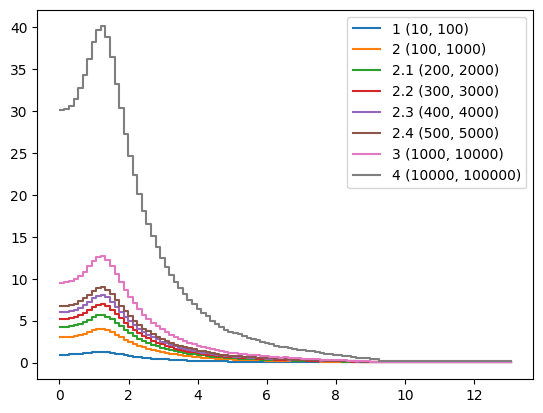

Name,N sig,N bkg,TPR,FPR,N sig',N bkg',sig,x_c,bin i
1,10,100,0.374939,0.0498907,3.74939,4.98907,1.26836,1.33219,10
2,100,1000,0.374939,0.0498907,37.4939,49.8907,4.01092,1.33219,10
2.1,200,2000,0.374939,0.0498907,74.9879,99.7813,5.67229,1.33219,10
2.2,300,3000,0.374939,0.0498907,112.482,149.672,6.94711,1.33219,10
2.3,400,4000,0.374939,0.0498907,149.976,199.563,8.02183,1.33219,10
2.4,500,5000,0.374939,0.0498907,187.47,249.453,8.96868,1.33219,10
3,1000,10000,0.374939,0.0498907,374.939,498.907,12.6836,1.33219,10
4,10000,100000,0.374939,0.0498907,3749.39,4989.07,40.1092,1.33219,10


In [ ]:
scenarios = { "1": (10,100),
              "2": (100,1000),
              "2.1": (200,2000),
              "2.2": (300,3000),
              "2.3": (400,4000),
              "2.4": (500,5000),
              "3": (1000,10000),
              "4": (10000,100000)
            }
_=compare_significance(scenarios)

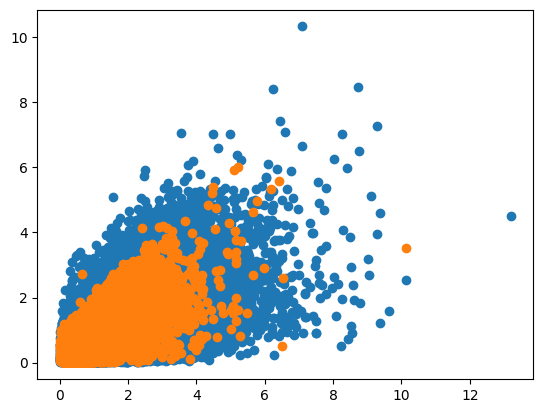

In [ ]:
plt.scatter(df_sig["M_TR_2"],df_sig["M_Delta_R"],label="Signal")
plt.scatter(df_bkg["M_TR_2"],df_bkg["M_Delta_R"],label="Signal")